In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import math 
import csv
from qmplot import manhattanplot, qqplot
import warnings
from statsmodels.stats.multitest import multipletests
warnings.filterwarnings("ignore")

# clusters
read in final louvain clusters as one spreadsheet 

In [2]:
clusters = pd.read_csv("louvain_clusters_final.txt", sep="\t", header=None)

In [19]:
cluster_dict = dict(zip(clusters[2].unique(), range(len(clusters)))) # assign a cluster a number for making the matrix later

# fst
read in output of PLINK hudson fst calculation 

In [20]:
fst = pd.read_csv("fst.fst.summary", sep="\t")

In [57]:
fst_mat = np.zeros(shape=((len(cluster_dict)), len(cluster_dict)))

for i, row in fst.iterrows(): 

    clst1, clst2 = cluster_dict[row["#POP1"]], cluster_dict[row["POP2"]] # get the cluster number of each of the clusters

    # order them such that we have the cluster with the smalleer number first and make add to matrix
    # this is so we have a nice tidy triangular matrix 
    if clst2 < clst1: 
        fst_mat[clst1, clst2] = row["HUDSON_FST"]
    else: 
        fst_mat[clst2, clst1] = row["HUDSON_FST"]

In [58]:
# make a nice dictionary for plotting 
fst_mat = pd.DataFrame(fst_mat)

fst_mat.columns = list(cluster_dict.keys()) # add the cluster  names for plotting 
fst_mat.index = list(cluster_dict.keys())

fst_mat = fst_mat.replace({0.0:np.nan})

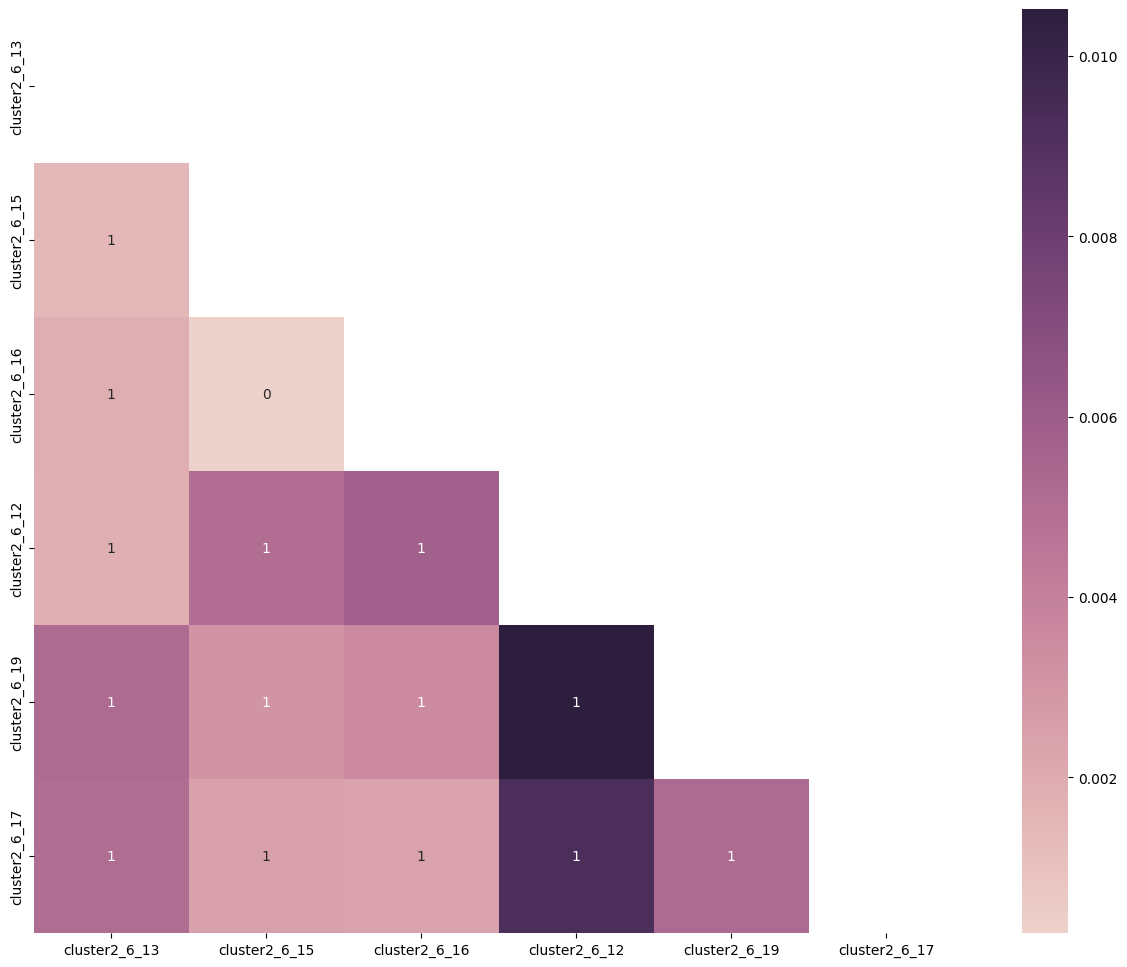

In [59]:
# plot as heatmap 
plt.figure(figsize=(15, 12))
sns.heatmap(fst_mat, annot=fst_mat > 0.001, 
            yticklabels=True, xticklabels=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [11]:
fst.sort_values(by="HUDSON_FST", ascending=False)

,#POP1,POP2,HUDSON_FST
2265,cluster2_8_45,cluster2_13_52,0.283966
2262,cluster2_8_45,cluster2_12,0.269001
1875,cluster2_8_32,cluster2_13_52,0.252385
1911,cluster2_8_33,cluster2_13_52,0.252283
1721,cluster2_8_28,cluster2_13_52,0.241485
...,...,...,...
478,cluster1_3_7,cluster1_3_10,0.000117
279,cluster1_2_4,cluster1_2_6,0.000107
1930,cluster2_8_34,cluster2_8_39,0.000101
2031,cluster2_8_37,cluster2_8_41,0.000089
